# Text-Based emotion detection 

In [53]:
#!pip install neattext
# !pip install text_hammer 


In [52]:
# Load EDA Pkgs
import pandas as pd
import numpy as np
import seaborn as sns
import neattext.functions as nfx
# Load ML Pkgs
 
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers => vectorization 
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer 
 
# metrics 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# to split the dataset to training and testing dataset 
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
import text_hammer as th

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

In [70]:
# Load Dataset
df = pd.read_csv("emotion_dataset_raw_amjad.csv")

In [71]:
df

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...
...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...
34788,joy,The world didnt give it to me..so the world MO...
34789,anger,A man robbed me today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO..."


In [4]:
df.shape

(34792, 2)

In [5]:
# Value Counts
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

In [6]:
df.drop(df[df.Emotion == "shame"].index, inplace=True)
df.drop(df[df.Emotion == "disgust"].index, inplace=True)
df.Emotion=df.Emotion.replace({"joy":0, 'sadness':1, "fear":2, "anger":3, "surprise":4, "neutral":5})

In [7]:
df['Emotion'].value_counts()

0    11045
1     6722
2     5410
3     4297
4     4062
5     2254
Name: Emotion, dtype: int64

In [8]:
# from tensorflow.keras.utils import to_categorical
# df['Emotion'] = to_categorical(df['Emotion'])

<AxesSubplot:xlabel='Emotion', ylabel='count'>

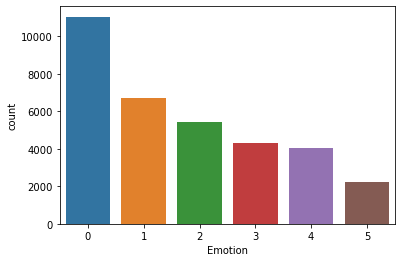

In [9]:
# Plot
sns.countplot(x='Emotion',data=df)

In [10]:
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

## Sentiment Analysis 

In [11]:
! pip install textblob
from textblob import TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    sentiement = blob.sentiment.polarity
    result = ""
    if sentiement > 0 :
        result = "Positive"
    elif sentiement < 0 :
        result = "Negative"
    else :
        result = "Neutral"
    return result 

In [12]:
get_sentiment("i love programming")

'Positive'

In [13]:
df2=df 
df2['Sentiment'] = df2["Text"].apply(get_sentiment)

In [14]:
df2.head()

,Emotion,Text,Sentiment
0,5,Why ?,Neutral
1,0,Sage Act upgrade on my to do list for tommorow.,Neutral
2,1,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative
3,0,Such an eye ! The true hazel eye-and so brill...,Positive
4,0,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral


In [15]:
# let's compare between emotions and sentiments 
df2.groupby(['Emotion','Sentiment']).size()

Emotion  Sentiment
0        Negative     1682
         Neutral      3648
         Positive     5715
1        Negative     2630
         Neutral      2127
         Positive     1965
2        Negative     1534
         Neutral      1843
         Positive     2033
3        Negative     1787
         Neutral      1386
         Positive     1124
4        Negative      623
         Neutral      1545
         Positive     1894
5        Negative      178
         Neutral      1523
         Positive      553
dtype: int64

<AxesSubplot:xlabel='Emotion,Sentiment'>

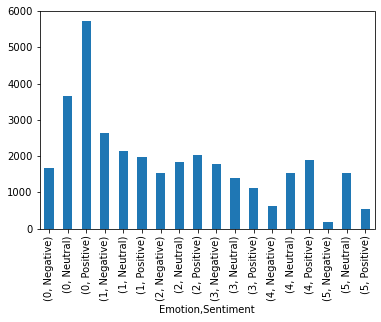

In [16]:
df2.groupby(['Emotion','Sentiment']).size().plot(kind="bar")

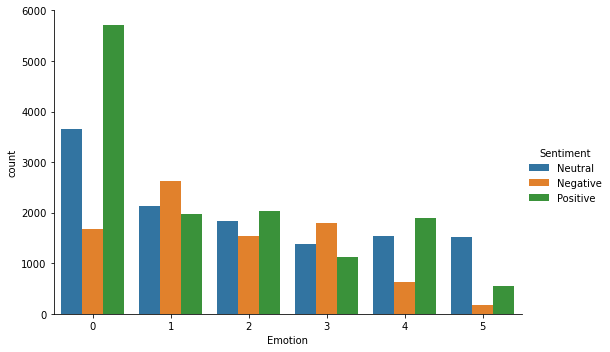

In [17]:
# another way for plotting data 
sns.catplot(x="Emotion",hue="Sentiment",data=df2,kind="count",aspect=1.5)

## clean the Text 

In [18]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [19]:
# User handles
df2['Clean_Text'] = df2['Text'].apply(nfx.remove_userhandles)

In [20]:
# Stopwords
df2['Clean_Text'] = df2['Clean_Text'].apply(nfx.remove_stopwords)

In [21]:

df2['Clean_Text'] = df2['Clean_Text'].apply(nfx.remove_hashtags)

In [22]:

df2['Clean_Text'] = df2['Clean_Text'].apply(nfx.remove_punctuations)

In [23]:
df2['Clean_Text'].str.replace(")","") 

C:\Users\Nourhan\AppData\Local\Temp/ipykernel_6432/3149712446.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['Clean_Text'].str.replace(")","")


0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4        ugh babe hugggzzz u  babe naamazed nga ako e b...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                                  Youu JEALOUSY   YOU
34791                                think baby dream time
Name: Clean_Text, Length: 33790, dtype: object

In [24]:
df2['Clean_Text'].str.replace("(","") 

C:\Users\Nourhan\AppData\Local\Temp/ipykernel_6432/4274815099.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['Clean_Text'].str.replace("(","")


0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4        ugh babe hugggzzz u  babe naamazed nga ako e b...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                                  Youu JEALOUSY   YOU
34791                                think baby dream time
Name: Clean_Text, Length: 33790, dtype: object

In [25]:
df2['Clean_Text'].str.replace(":","") 

0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4        ugh babe hugggzzz u  babe naamazed nga ako e b...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                                  Youu JEALOUSY   YOU
34791                                think baby dream time
Name: Clean_Text, Length: 33790, dtype: object

In [26]:
df2['Clean_Text'].str.replace("'","") 

0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4        ugh babe hugggzzz u  babe naamazed nga ako e b...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                                  Youu JEALOUSY   YOU
34791                                think baby dream time
Name: Clean_Text, Length: 33790, dtype: object

In [27]:
df2.head()

,Emotion,Text,Sentiment,Clean_Text
0,5,Why ?,Neutral,
1,0,Sage Act upgrade on my to do list for tommorow.,Neutral,Sage Act upgrade list tommorow
2,1,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,0,Such an eye ! The true hazel eye-and so brill...,Positive,eye true hazel eyeand brilliant Regular feat...
4,0,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral,ugh babe hugggzzz u babe naamazed nga ako e b...


## Keyword extraction 

- exract the most common word in each class 

In [28]:
from collections import Counter 

In [29]:
def extraxt_keywords(text,num=50):
    tokens = [tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

-let's check it , in a simple example on calculating the most common word in "joy" class 


In [30]:
emotion_list = df2['Emotion'].unique().tolist()
print(emotion_list)

[5, 0, 1, 2, 4, 3]


In [34]:
joy_list = df2[df2['Emotion']==0]['Clean_Text'].tolist()
for i in joy_list:
    print(i)

Sage Act upgrade list tommorow
eye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness 
ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang
life  Leopold truly happy : hopes prayers beloved son come fruition 
feeling fail french  
GoodLet  
fell love \X\ Overnight felt confidence selfesteem responsible worthwhile
terribly ecstatic dangerous thing 
selected study university
Yeah  ’ ages  
passed BA exams class results
heard selected fot year university Zambia form Chikola secondary school
Welp time study days
Heading campus rain grad photos
feeling awesome 
brings  Ive bought Christmas presents trawl loads shops :)
shit pants Pure 100% gravy
life  Leopold truly happy : hopes prayers beloved son come fruition 
Class jamming paper quarter re

sisters wedding
Home 3 hours night week
 use good luck 
passed university entrance exam
 wish luck 
Finding grades end freshman year
source smile   source joy
Yuk Doc Hope likes me Well know Thats relative
Damn 7 missing assignments math :o  study  
Id like come weekend 
Finished studying 3rd final today taking little break final study final Monday
Passing examination felt sure failed
wish didnr nap earlier wide awake
chris paul lakers what super team
book moves close highly critical analysis science antiscience  antiscientific : Jones s delight physics enthusiastically drawing sting criticism 
Office episode written
people fall asleep me
Ok  2 bits straightforward copy editing left amp shit load costume iron amp sofa book
bad @ something cant knock try 1/2 time ppl 1s love most kill
Spending 3 days school History Philosophy Religion Classics teach modern Arabic intellectual history
quotIt makes grateful   makes   joyfulquot  David Rast
Finals over glad little school break
excellent  s

George drove past felt terrible anger replace elation 
sister brother law returned Sri Lanka adopted child went pick airport
Glad class over Time study hall break study hall night class
  pleased agreed 
comprare el cd uds tdo por ti acostumbro el pop xq soy reggaetonero pro tdo x lt3
Psych study guide need study it
3 Christmas wishes Share us    
true tend skip walking jump puddles giggle :D like mom taught me contagious
Thought going today instead got varsity boys
bought Sunless 97  quotMaking Wavesquot EP ITUNES 
nextdoor neighbours hell got decorations thing plays Jingle Bells incessantly
’  Thank 
Let lead way today Follow flow amp  
Sunday morning Love it Win Saturday day rest today Coffee brewing toast popping books waiting Space Quiet
1st flight accomplished lunch amp tthen airplane
laughed  showing white  sharp teeth  pleased joke 
Uh wonderful finsh book today
counselors nice  best summer  mosquitoes 
nice cinema  
shitty rainy monday morning
Want Pilates class appear mountai

Champions League round tonight :)
Listening Christmas music clean :)
Failed spanish quiz alek
Charleigh Emery Duvall arrived night 9:13 pm EST 6 lbs 14 oz 20 in Anybody got primer new grandparents
Class canceled time work
pleased Canadians World Cup beaten  
Suddenly  relief  telephone rang  Joanna picked  wrote message  came table  looking elated 
lions wings desperate housewives
cometh     true way wealth aiming daily improve health
Teacher coming hour 
cry 2 tears  im happy :)
wat bro feeling rite toite gon turn upliterally
comment ca Moi c smaine qui commence pas du bon pied
love hearing random angry outbursts cubes hall: quotits f***ing attachment sent you lazy sack s**tquot
change HLNTV lighter fare amp eagerly await Behar Show
got stressed study guidethat
Talkiing past happy hours friends night camp months ago shared feelings notions hidden anxiety thought cared happy satified
happened selected Secondary school start Form October 1980
4am Im wide awake Sore throat amp lots water

Danny grown 
looking 2 test essay tomorrow 4 classes
Time start homework
Got big fish fishing
Apparently somebody tried break night  
 supposed going Sister Agape  d pleased place 
hour history  Library homework :)
Lovely day  
found old lava lamp
Achievement task friend begun new job confident handling situation thinking leaving job 2 days employment
happy   big game 
day week finally Tomorrow actually sleep in
got married
Abundance is: seeing lots lots family eat lots delicious food beautiful places repeatedly days
kinder surprise case happy meal toy shit enough
end semester got approval matter judged difficult
Rockin RugRats tube episode understand sheer   enjoy little things
great minds think alike Especially belonging soulless victims chem lab
BET channel thats workig tv
random  th crib day 
Christmas tree oh Christmas tree lovely is
night: quotI think Id like stay child way stop growingquot
long day tomorrow sick  
point event help drunk clients locate quotmisplacedquot items
cam

In [35]:
# make the list as a string so we can calculate the most common word 
joy_docx = ' '.join(joy_list)
print(joy_docx)

Sage Act upgrade list tommorow eye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness  ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang life  Leopold truly happy : hopes prayers beloved son come fruition  feeling fail french   GoodLet   fell love \X\ Overnight felt confidence selfesteem responsible worthwhile terribly ecstatic dangerous thing  selected study university Yeah  ’ ages   passed BA exams class results heard selected fot year university Zambia form Chikola secondary school Welp time study days Heading campus rain grad photos feeling awesome  brings  Ive bought Christmas presents trawl loads shops :) shit pants Pure 100% gravy life  Leopold truly happy : hopes prayers beloved son come fruition  Class jamming paper quarter re

In [36]:
# extract the most common words in joy_docx 
key_dict = extraxt_keywords(joy_docx)
key_dict

{'day': 729,
 'amp': 678,
 'time': 604,
 'Im': 555,
 'work': 510,
 'like': 476,
 'today': 471,
 'tomorrow': 467,
 'Christmas': 453,
 'love': 393,
 'happy': 368,
 'good': 345,
 'night': 332,
 'got': 328,
 ':)': 311,
 'going': 304,
 'home': 302,
 'school': 297,
 'morning': 288,
 '2': 262,
 'joy': 258,
 'life': 252,
 'hours': 251,
 'week': 231,
 'feel': 227,
 'year': 225,
 'days': 208,
 'tonight': 205,
 'long': 204,
 'people': 201,
 'me': 197,
 'great': 194,
 'sleep': 185,
 'new': 181,
 'family': 181,
 's': 180,
 'God': 177,
 'know': 177,
 'hour': 172,
 'friend': 169,
 'felt': 167,
 'cant': 165,
 'it': 162,
 'feeling': 159,
 'RT': 159,
 'friends': 155,
 'think': 148,
 'excited': 145,
 'right': 142,
 'class': 141}

In [37]:
import matplotlib.pylab as plt
# plot the most common word 
def plot_most_common_words(mydict,emotion_name):
    df_01 = pd.DataFrame(mydict.items(),columns=['taken','count'])
    plt.figure(figsize=(20,10))
    plt.title("Plot of {}".format(emotion_name))
    sns.barplot(x='taken',y='count',data=df_01)
    plt.xticks(rotation=45)
    plt.show()

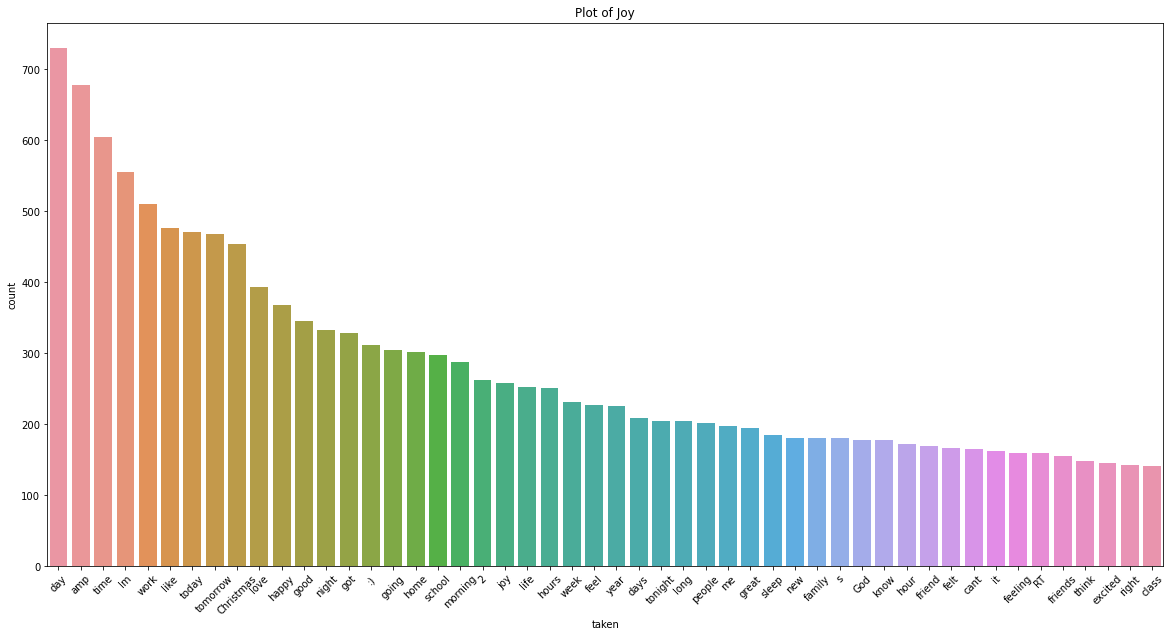

In [38]:
plot_most_common_words(key_dict,"Joy")

{'Im': 486, ':(': 422, 'sad': 409, 'time': 324, 'like': 313, 'day': 241, 'died': 234, 'felt': 229, 'know': 225, 'friend': 224, 'feel': 218, 'cant': 215, 'home': 196, 'got': 187, 's': 186, 'going': 182, 'sorry': 181, 'miss': 178, 'people': 169, '’': 164, 'think': 160, 'good': 151, 'away': 149, 'me': 148, 'today': 148, 'left': 147, 'work': 146, 'love': 143, 'friends': 141, 'life': 137, 'it': 136, 'night': 135, 'want': 135, 'bad': 120, 'school': 118, 'years': 118, 'said': 115, 'right': 112, 'year': 112, 'mother': 108, 'days': 107, 'lost': 106, 'tomorrow': 106, 'depressed': 105, 'family': 104, 'amp': 104, 'miserable': 104, 'u': 104, 'Oh': 101, 'thought': 100}


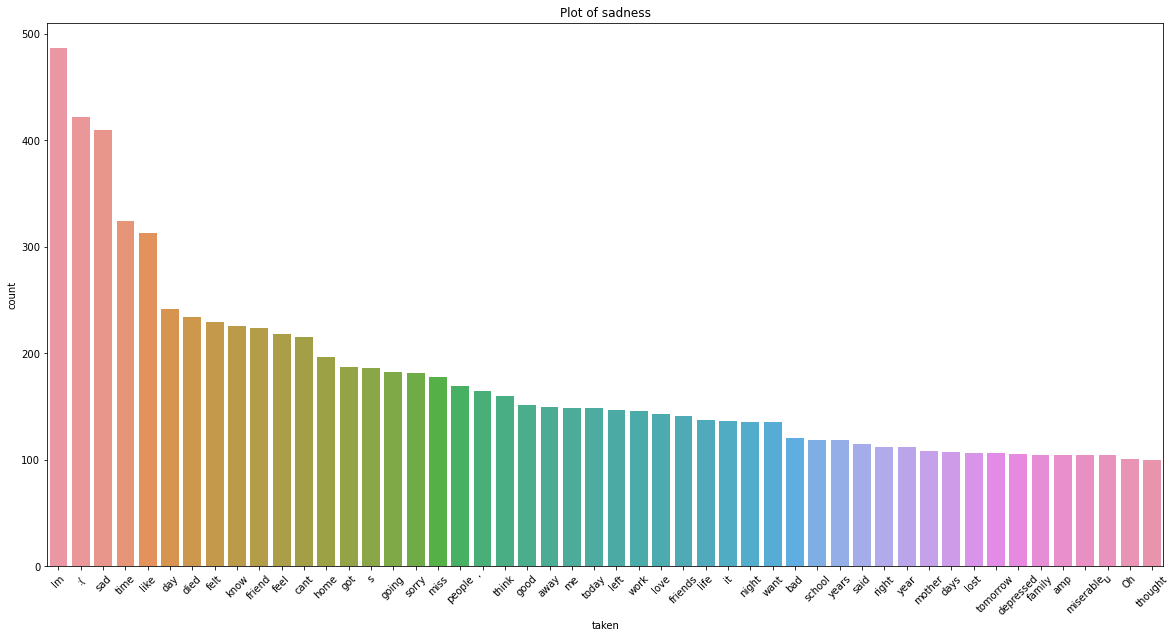

In [40]:
sadness_list = df2[df2['Emotion']==1]['Clean_Text'].tolist() # get the list of emotion_category 
sadness_docx = ' '.join(sadness_list) # make it as one string 
key_dict_sadness = extraxt_keywords(sadness_docx) # count each word 
print(key_dict_sadness)
plot_most_common_words(key_dict_sadness,"sadness") # plot the results 

In [41]:
# word cloud
#!pip install wordcloud
from wordcloud import WordCloud 

ModuleNotFoundError: No module named 'wordcloud'

In [40]:
def plot_wordcloud(docx):
    myWordCloud = WordCloud().generate(docx)
    plt.figure(figsize=(15,10))
    plt.imshow(myWordCloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

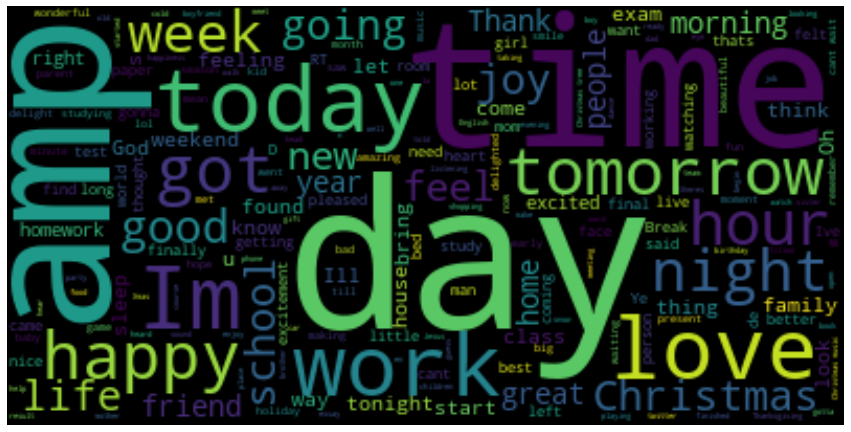

In [41]:
plot_wordcloud(joy_docx)

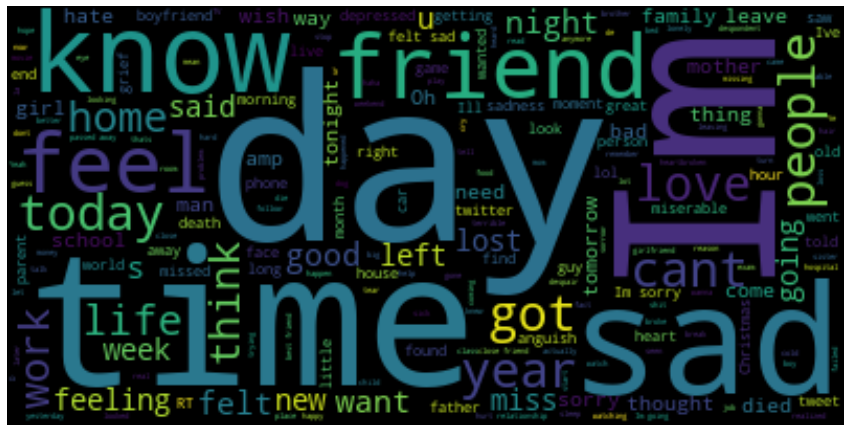

In [42]:
plot_wordcloud(sadness_docx)

## Machine learning Text classification 

+ SVM 
+ naive bayes 
+ logestic regression 
+ KNN 
+ Descision tree 

+ compare with sparkNLP / NLU john snows lab 

In [44]:
# Features & Labels
Xfeatures = df2['Clean_Text']
ylabels = df2['Emotion']
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print(Xfeatures.head())
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print(ylabels.head())

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
0                                                     
1                       Sage Act upgrade list tommorow
2    WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3    eye  true hazel eyeand brilliant  Regular feat...
4    ugh babe hugggzzz u  babe naamazed nga ako e b...
Name: Clean_Text, dtype: object
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
0    5
1    0
2    1
3    0
4    0
Name: Emotion, dtype: int64


machine learning model cann't understand the text so we have to transfer the text to numbers , this process called vectorization 

In [45]:
#vectorization 
cv = CountVectorizer()
x=cv.fit_transform(Xfeatures)

In [46]:
# get features by name 
cv.get_feature_names()

['00',
 '000',
 '000ème',
 '0021',
 '00am',
 '00pm',
 '01',
 '0235299130',
 '0330',
 '0400',
 '045',
 '06',
 '073',
 '0798765',
 '08',
 '0800',
 '09',
 '099b8',
 '0l',
 '0ntworpen',
 '0o',
 '0oquot',
 '0w',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '100000yr',
 '10000th',
 '1000s',
 '1000shs',
 '1000th',
 '100s',
 '100th',
 '101',
 '1010',
 '1015',
 '101quot',
 '102',
 '1021',
 '1022',
 '103',
 '1030',
 '1030am',
 '1030pm',
 '10373629',
 '104',
 '1040',
 '105',
 '106',
 '1080',
 '10am',
 '10ans',
 '10h',
 '10hrs',
 '10k',
 '10mins',
 '10pm',
 '10puntos',
 '10ritengono',
 '10th',
 '10x',
 '10year',
 '10years',
 '10yrolds',
 '11',
 '110',
 '1100pm',
 '1104',
 '110km',
 '111',
 '1111ème',
 '112',
 '1130',
 '115',
 '1162',
 '118',
 '11am',
 '11hour',
 '11months',
 '11pm',
 '11yr',
 '12',
 '120',
 '1200',
 '121',
 '12181',
 '122',
 '122511',
 '123',
 '1230',
 '125',
 '1250',
 '12521260',
 '128',
 '128600',
 '1295',
 '12hours',
 '12hr',
 '12km',
 '12th',
 '12xbuild',
 '12xsmile',
 '12yea

In [47]:
# to Dense Numpy array 
#x.toarray()

In [48]:
#  Split the Dataset
x_train,x_test,y_train,y_test = train_test_split(x,ylabels,test_size=0.3,random_state=42)

## Build our model 


In [54]:
# y_train = to_categorical(df.Sentiment.values)
# y_test = to_categorical(df_test.Sentiment.values)


## SVM

In [55]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [56]:
np.random.seed(610)

linearr = svm.SVC(kernel='linear', decision_function_shape='ovr').fit(x_train, y_train)
predictionslinn = linearr.predict(x_test)
print("linear: ",accuracy_score(y_test,predictionslinn))

rbff = svm.SVC(kernel='rbf', decision_function_shape='ovr').fit(x_train, y_train)
predictionslinnn = rbff.predict(x_test)
print("rbf: ",accuracy_score(y_test,predictionslinnn))


polyy = svm.SVC(kernel='poly', decision_function_shape='ovr').fit(x_train, y_train)
predictionslinp = polyy.predict(x_test)
print("poly: ",accuracy_score(y_test,predictionslinp))

sigg = svm.SVC(kernel='sigmoid', decision_function_shape='ovr').fit(x_train, y_train)
predictionslins = sigg.predict(x_test)
print("sig: ",accuracy_score(y_test,predictionslins))


linear:  0.6093518792542172
rbf:  0.6213869981256782
poly:  0.4199467298017165
sig:  0.5857748840879945


## Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier( criterion = 'entropy', random_state = 42)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [58]:
y_pred = classifier.predict(x_test)

In [59]:

print("acc: ",accuracy_score(y_test,y_pred))


acc:  0.5804478642596429


## Naive Bayes

In [60]:
nv_model = MultinomialNB()
nv_model.fit(x_train,y_train)

MultinomialNB()

In [61]:
# check the accuracy of the model 
# method 1 : 
nv_model.score(x_test,y_test)

0.575318141461971

## logistic Regression

In [64]:

lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)


C:\Users\Nourhan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
# check the accuracy of the linear regression model 
lr_model.score(x_test , y_test)

0.6340140080891783

In [68]:
def predict_emotion(text,model):
    # vectorizing the text that will be an input to the model
    vectorized_text = cv.transform(text).toarray() 
    prediction = model.predict(vectorized_text)
    prediction_probability = model.predict_proba(vectorized_text)
    prediction_percentage_for_all = dict(zip(model.classes_ , prediction_probability[0])) 
    print("Prediction:{}, Prediction score :{}".format(prediction[0],np.max(prediction_probability)))
    #return prediction_percentage_for_all
                                         
sample_test = ["i love artificial intelligence so much "] # text  to test the model with 
predict_emotion(sample_test,nv_model)



Prediction:0, Prediction score :0.34707035705533734


In [69]:
# a single prediction using linear regression model 
sample_test2 = ["i love DEBI "] # text  to test the model with 
predict_emotion(sample_test2,lr_model) 

Prediction:0, Prediction score :0.37925054904244077


### Save the Model

In [59]:
import joblib 

In [60]:
model_file=open("Text_based_emotion_classifier_nv_model_26_april_2022.pkl","wb")
joblib.dump(lr_model,model_file)
model_file.close()